In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE DATASET
data=pd.read_csv('Corporate_Taxes.csv')

In [3]:
#DATA EXPLORATION AND VISUALISATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Financial_Year   22 non-null     int64
 1   Corporate_Taxes  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [4]:
data.describe()

,Financial_Year,Corporate_Taxes
count,22.000000,22.000000
mean,2010.500000,311953.909091
std,6.493587,211860.957869
min,2000.000000,35696.000000
25%,2005.250000,112037.250000
50%,2010.500000,310752.000000
75%,2015.750000,456596.250000
max,2021.000000,712037.000000


<AxesSubplot:>

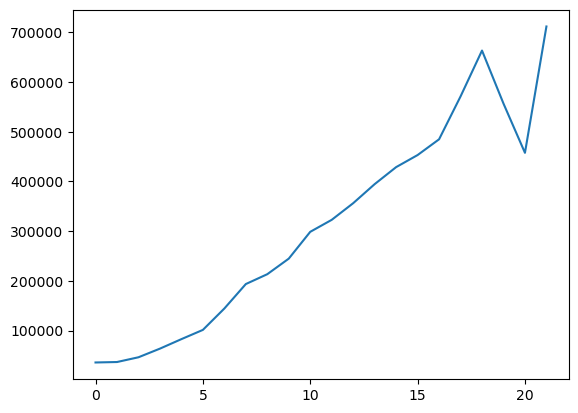

In [5]:
data_CT=data['Corporate_Taxes']
data_CT.plot()

<AxesSubplot:>

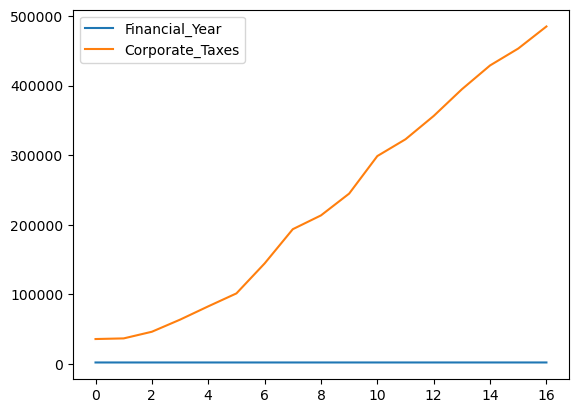

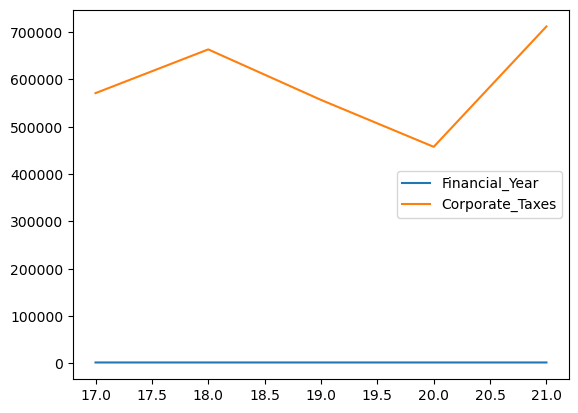

In [6]:
#TEST-TRAIN SPLIT
msk=(data.index<len(data)-5)
data_train=data[msk].copy()
data_test=data[~msk].copy()
CT_Train=data_train['Corporate_Taxes']

data_train[''.plot()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


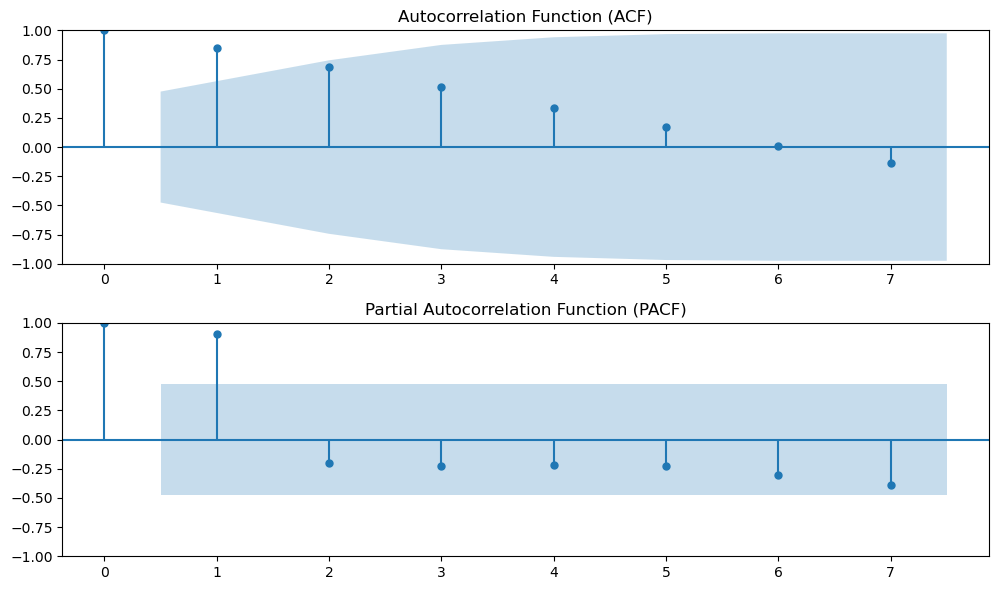

In [7]:
#CHECKING STATIONARITY OF THE TRAIN DATASET
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots for the "Other Direct Taxes" series
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# ACF Plot
plot_acf(CT_Train, lags=7, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(CT_Train, lags=7, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [8]:
#PERFORMING THE ADF TEST
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on "Other Direct Taxes"
adf_test = adfuller(CT_Train)

# Print the ADF test results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

ADF Statistic: -2.0280436507602513
p-value: 0.2744138875324045
Critical Values:
1%: -4.331573
5%: -3.23295
10%: -2.7487


<AxesSubplot:>

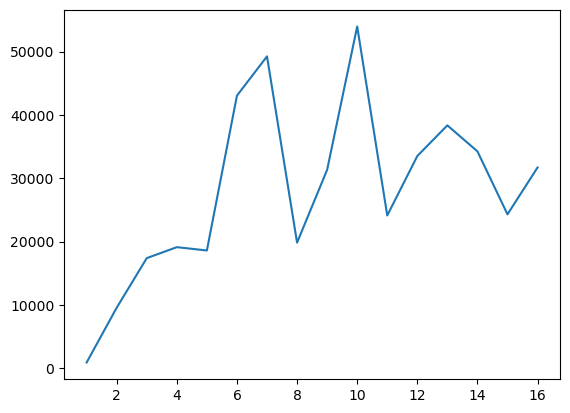

In [9]:
#DIFFERENCING TO MAKE THE DATA STATIONARY
data_train_diff = CT_Train.diff().dropna()
data_train_diff.plot()

In [10]:
adf_test = adfuller(data_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.04763744895038177


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


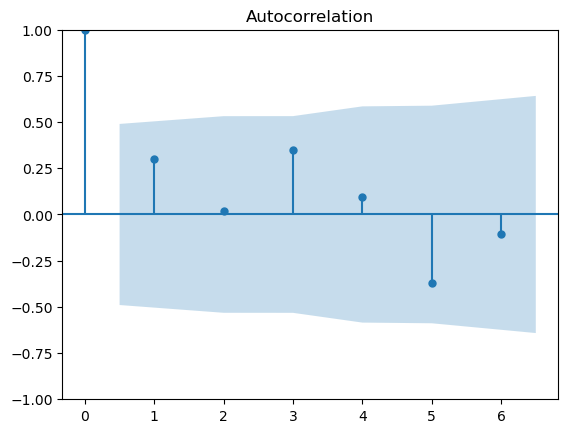

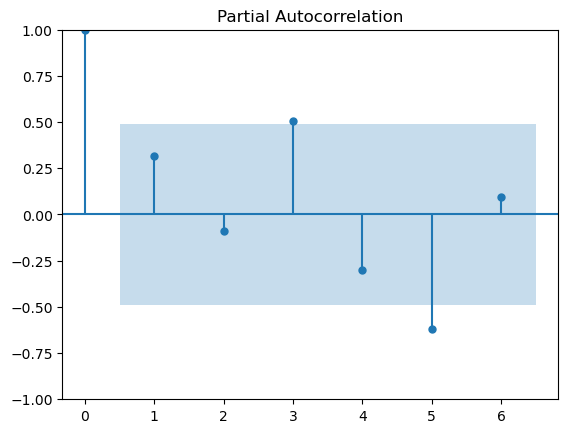

In [11]:
acf_diff = plot_acf(data_train_diff, lags=6)
pacf_diff = plot_pacf(data_train_diff, lags=6)

In [12]:
#ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(CT_Train, order=(2,1,3))
model_fit = model.fit()
print(model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        Corporate_Taxes   No. Observations:                   17
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -174.683
Date:                Thu, 19 Oct 2023   AIC                            361.366
Time:                        10:41:12   BIC                            366.002
Sample:                             0   HQIC                           361.604
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8033      1.394      0.576      0.564      -1.929       3.536
ar.L2          0.1429      1.406      0.102      0.919      -2.613       2.899
ma.L1         -0.4669      1.160     -0.402      0.6

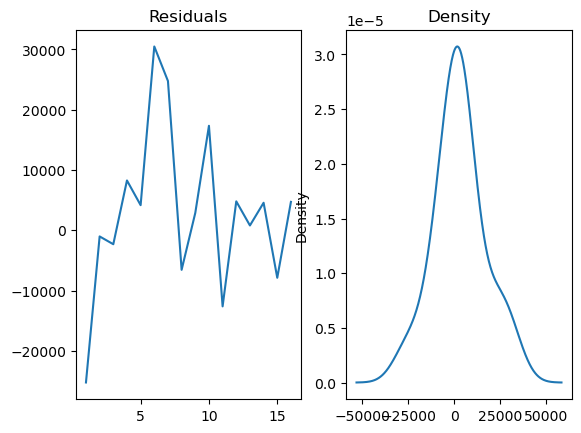

In [13]:
#RESIDUAL ANALYSIS
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


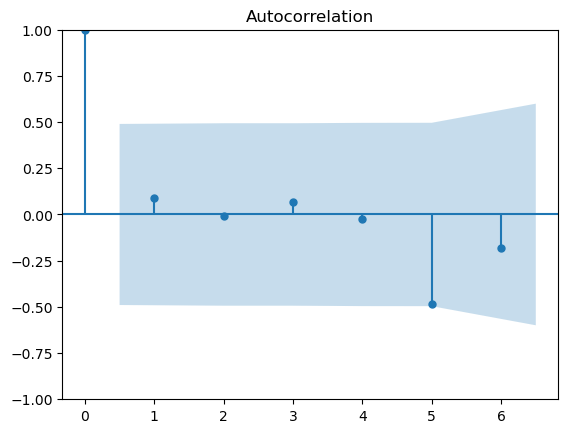

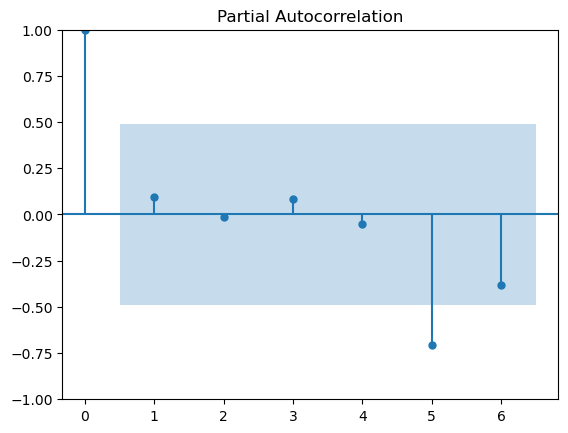

In [14]:
acf_res = plot_acf(residuals,lags=6)
pacf_res = plot_pacf(residuals,lags=6)

In [15]:
#FORECASTING
forecast_test = model_fit.forecast(len(data_test))
print(forecast_test)

17    515511.079899
18    540633.947921
19    566719.503641
20    591264.940374
21    614710.750183
Name: predicted_mean, dtype: float64


In [20]:
from sklearn.metrics import mean_absolute_error

In [22]:
CT_Test=data_test['Corporate_Taxes']
mae = mean_absolute_error(CT_Test, forecast_test)
print("MAE:", mae)

MAE: 383051.72275006754
